
# Project: Investigate and analyze ITMDB 5000 Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


## Introduction
    
   <p>Choosing the ITMDB 5000 Movie Datasetfor analysis becuase i have familier with this business like more persoms.dataset
     contains a clear data about 10000 movies include Budget , Revenue and vote rate for each movie and onther data for           each film</p>
     
### Questions:
<ul>
    <li>
     1- Which genres are most popular from year to year?
    </li>
 </ul>
 <ul>
    <li>
     2-Which genres has the highest and lowest budget from year to year?
    </li>
 </ul>
<ul> 
    <li>
     3-Which year has the highest release of movies?
    </li>
</ul> 
<ul>
    <li>
     4-What level of vote rating(vote_average value)receives highest revenue?
    </li>
    

    


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html



<a id='wrangling'></a>
## Data Wrangling

>  After the observation for the dataset that loaded and posed some question i will delete unused data non relative to this analysis and keep the rest of data that is relative to the analysis .

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
#print first two rows from dataset
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
#Get the number of rows and columns
df.shape

(10866, 21)

#### data set contains 10866 rows and 21 columns

In [4]:
#view some basic statistical details like percentile, mean, std etc. of a data frame
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


</head>

<body lang=EN-US style='tab-interval:.5in;word-wrap:break-word'>

<div class=WordSection1>

<p class=MsoNormal><span style='font-size:20.0pt;line-height:106%;color:#44546A;
mso-themecolor:text2'>Observation</span><b>: after describe the data I found
more data of Zero in the most feature depend on my question that I posed. <span
style='mso-spacerun:yes'> </span>I found data in three columns<o:p></o:p></b></p>

<p class=MsoListParagraphCxSpFirst style='margin-left:132.75pt;mso-add-space:
auto;text-indent:-.25in;mso-list:l0 level1 lfo1'><![if !supportLists]><span
style='mso-ascii-font-family:Calibri;mso-fareast-font-family:Calibri;
mso-hansi-font-family:Calibri;mso-bidi-font-family:Calibri;mso-bidi-font-weight:
bold'><span style='mso-list:Ignore'>-<span style='font:7.0pt "Times New Roman"'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
</span></span></span><![endif]><span dir=LTR></span><b><span style='font-size:
9.0pt;line-height:106%;font-family:"Helvetica",sans-serif;color:black;
background:white'>budget</span><o:p></o:p></b></p>

<p class=MsoListParagraphCxSpMiddle style='margin-left:132.75pt;mso-add-space:
auto;text-indent:-.25in;mso-list:l0 level1 lfo1'><![if !supportLists]><span
style='mso-ascii-font-family:Calibri;mso-fareast-font-family:Calibri;
mso-hansi-font-family:Calibri;mso-bidi-font-family:Calibri;mso-bidi-font-weight:
bold'><span style='mso-list:Ignore'>-<span style='font:7.0pt "Times New Roman"'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
</span></span></span><![endif]><span dir=LTR></span><b><span style='font-size:
9.0pt;line-height:106%;font-family:"Helvetica",sans-serif;color:black;
background:white'>revenue</span><o:p></o:p></b></p>

<p class=MsoListParagraphCxSpLast style='margin-left:132.75pt;mso-add-space:
auto;text-indent:-.25in;mso-list:l0 level1 lfo1'><![if !supportLists]><span
style='mso-ascii-font-family:Calibri;mso-fareast-font-family:Calibri;
mso-hansi-font-family:Calibri;mso-bidi-font-family:Calibri;mso-bidi-font-weight:
bold'><span style='mso-list:Ignore'>-<span style='font:7.0pt "Times New Roman"'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
</span></span></span><![endif]><span dir=LTR></span><b><span style='font-size:
9.0pt;line-height:106%;font-family:"Helvetica",sans-serif;color:black;
background:white'>runtime</span></span><o:p></o:p></b></p>

<p class=MsoNormal><b><span
style='mso-spacerun:yes'>                                 </span>that I will
check carefully …<o:p></o:p></b></p>

</div>

</body>

</html>


In [5]:
#identify total number for rows and columns with missing values for each column . and knowing the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
#identify data type for each column in data set
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
#number of unique values for each column in datase
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [8]:
# check value counts for budget column
df['budget'].value_counts()

0           5696
20000000     190
15000000     183
25000000     178
10000000     176
            ... 
40000          1
28             1
68             1
3500159        1
19000          1
Name: budget, Length: 557, dtype: int64

In [9]:
#Display rows with one or more NaN values in dataset
null_data = df[df.isna().any(axis=1)]
 
null_data

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
18,150689,tt1661199,5.556818,95000000,542351353,Cinderella,Lily James|Cate Blanchett|Richard Madden|Helen...,NaN,Kenneth Branagh,Midnight is just the beginning.,...,"When her father unexpectedly passes away, youn...",112,Romance|Fantasy|Family|Drama,Walt Disney Pictures|Genre Films|Beagle Pug Fi...,3/12/15,1495,6.8,2015,8.739996e+07,4.989630e+08
21,307081,tt1798684,5.337064,30000000,91709827,Southpaw,Jake Gyllenhaal|Rachel McAdams|Forest Whitaker...,NaN,Antoine Fuqua,Believe in Hope.,...,"Billy ""The Great"" Hope, the reigning junior mi...",123,Action|Drama,Escape Artists|Riche-Ludwig Productions,6/15/15,1386,7.3,2015,2.759999e+07,8.437300e+07
26,214756,tt2637276,4.564549,68000000,215863606,Ted 2,Mark Wahlberg|Seth MacFarlane|Amanda Seyfried|...,NaN,Seth MacFarlane,"Ted is Coming, Again.",...,Newlywed couple Ted and Tami-Lynn want to have...,115,Comedy,Universal Pictures|Media Rights Capital|Fuzzy ...,6/25/15,1666,6.3,2015,6.255997e+07,1.985944e+08
32,254470,tt2848292,3.877764,29000000,287506194,Pitch Perfect 2,Anna Kendrick|Rebel Wilson|Hailee Steinfeld|Br...,NaN,Elizabeth Banks,We're back pitches,...,"The Bellas are back, and they are better than ...",115,Comedy|Music,Universal Pictures|Gold Circle Films|Brownston...,5/7/15,1264,6.8,2015,2.667999e+07,2.645056e+08
33,296098,tt3682448,3.648210,40000000,162610473,Bridge of Spies,Tom Hanks|Mark Rylance|Amy Ryan|Alan Alda|Seba...,NaN,Steven Spielberg,"In the shadow of war, one man showed the world...",...,"During the Cold War, the Soviet Union captures...",141,Thriller|Drama,DreamWorks SKG|Amblin Entertainment|Studio Bab...,10/15/15,1638,7.1,2015,3.679998e+07,1.496016e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [10]:
#count number of zero in revenue columns
count_rev = (df['revenue'] == 0).sum()
print('Number of zero data contained by revenue columns  : ',count_rev)



Number of zero data contained by revenue columns  :  6016


In [11]:
#count number of zero in budget columns
count_budg = (df['budget'] == 0).sum()
print('Number of zero data contained by budget columns  : ',count_budg)

Number of zero data contained by budget columns  :  5696


</head>

<body lang=EN-US style='tab-interval:.5in;word-wrap:break-word'>

<div class=WordSection1>

<p class=MsoNormal><b><span style='font-size:16.0pt;line-height:107%;
color:#323E4F;mso-themecolor:text2;mso-themeshade:191'>To eliminate repeated
check for zeros in all columns I will use loop to identify for each column <o:p></o:p></span></b></p>

</div>

</body>

</html>

In [12]:
#  Count number of zeros in all columns of Dataframe
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  id  is :  0
Count of zeros in column  imdb_id  is :  0
Count of zeros in column  popularity  is :  0
Count of zeros in column  budget  is :  5696
Count of zeros in column  revenue  is :  6016
Count of zeros in column  original_title  is :  0
Count of zeros in column  cast  is :  0
Count of zeros in column  homepage  is :  0
Count of zeros in column  director  is :  0
Count of zeros in column  tagline  is :  0
Count of zeros in column  keywords  is :  0
Count of zeros in column  overview  is :  0
Count of zeros in column  runtime  is :  31
Count of zeros in column  genres  is :  0
Count of zeros in column  production_companies  is :  0
Count of zeros in column  release_date  is :  0
Count of zeros in column  vote_count  is :  0
Count of zeros in column  vote_average  is :  0
Count of zeros in column  release_year  is :  0
Count of zeros in column  budget_adj  is :  5696
Count of zeros in column  revenue_adj  is :  6016


#### Result appears some columns contain value of zero like budget,revenue,runtime,budget_adj,revenue_adj

In [13]:
#features with missing values>>> this very important to decide what columns will drop and columns will clean from null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Drop Extraneous Columns
>  after assesing Data I found there are more than columns must be drop the data:
  ####  imdb_id,homepage,tagline,keywords,overview,production_companies,budget_adj,revenue_adj



In [14]:
drop_list=['imdb_id', 'homepage', 'tagline', 'keywords','overview','production_companies','budget_adj','revenue_adj']
df.drop(drop_list, axis=1, inplace=True)

In [15]:
df.shape

(10866, 13)

#### after drop the columns and check the shape of dataset i found dataset appear to has 13 columns and 10866 rows

### Data Cleaning ....there are observation during assising data like below:
 #### After drop all columns that not related to dataset so i will check the data again to make full clean.
 > - check about duplicates if exit i will drop it.
 > - check zero values in three columns (budget,revenue and revenue)
 > - need to replces zero values in these columns 
 > - check null values and drop from dataset
 > - change datatypes for culomns (budget,revenue and revenue)
 > - replace data in genres column with the first occurrencs of data to identify accuracy data

In [16]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   cast            10790 non-null  object 
 6   director        10822 non-null  object 
 7   runtime         10866 non-null  int64  
 8   genres          10843 non-null  object 
 9   release_date    10866 non-null  object 
 10  vote_count      10866 non-null  int64  
 11  vote_average    10866 non-null  float64
 12  release_year    10866 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 1.1+ MB


In [17]:
#features with missing values>>> this very important to decide what columns will drop 
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [18]:
# print number of duplicates in datasets
print('number of duplicates exist in dataset is : ',df.duplicated().sum())

number of duplicates exist in dataset is :  1


In [19]:
# drop duplicates in dataset
df.drop_duplicates(inplace=True)

In [20]:
# print number of duplicates again to confirm dedupe - should both be 0
print('number of duplicates exist in dataset is : ',df.duplicated().sum())

number of duplicates exist in dataset is :  0


##### after check data and drop duplicates i will replcae value of  0 from dataset with three columns:
 ##### -budget
 ##### -revenue
 ##### -runtime

In [21]:
#list of three columns that will replace its zero values with mean
list_zero=['budget','revenue','runtime']
for c in list_zero:
    df[c]=df[c].replace(0,df[c].mean())

In [22]:
# check again if Count number of zeros in all columns of Dataframe
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  id  is :  0
Count of zeros in column  popularity  is :  0
Count of zeros in column  budget  is :  0
Count of zeros in column  revenue  is :  0
Count of zeros in column  original_title  is :  0
Count of zeros in column  cast  is :  0
Count of zeros in column  director  is :  0
Count of zeros in column  runtime  is :  0
Count of zeros in column  genres  is :  0
Count of zeros in column  release_date  is :  0
Count of zeros in column  vote_count  is :  0
Count of zeros in column  vote_average  is :  0
Count of zeros in column  release_year  is :  0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   popularity      10865 non-null  float64
 2   budget          10865 non-null  float64
 3   revenue         10865 non-null  float64
 4   original_title  10865 non-null  object 
 5   cast            10789 non-null  object 
 6   director        10821 non-null  object 
 7   runtime         10865 non-null  float64
 8   genres          10842 non-null  object 
 9   release_date    10865 non-null  object 
 10  vote_count      10865 non-null  int64  
 11  vote_average    10865 non-null  float64
 12  release_year    10865 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 1.2+ MB


### opps.... i observe datatypes for three columns changed to float so i will change datatypes for columns .. but first check for null valus and drop it.

In [24]:
#again i will check for null values
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

#### Drop null values and check agian if exist

In [25]:
# drop rows with any null values in dataset
df.dropna(inplace=True) 

#check for null values again to insure..
print(df.isnull().sum())

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64


In [26]:
df.shape

(10731, 13)

#### after drop nulls vlaues the dataset contain 10731 rows and 13 columns

### change datatypes for culoms to int datatype

In [27]:
#list of columns that will change datatypes
list_type=['budget','revenue','runtime']
# convert datatype for budget,revenue and runtime columns to int
for c in list_type:
    df[c] = df[c].astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10731 non-null  int64  
 1   popularity      10731 non-null  float64
 2   budget          10731 non-null  int32  
 3   revenue         10731 non-null  int32  
 4   original_title  10731 non-null  object 
 5   cast            10731 non-null  object 
 6   director        10731 non-null  object 
 7   runtime         10731 non-null  int32  
 8   genres          10731 non-null  object 
 9   release_date    10731 non-null  object 
 10  vote_count      10731 non-null  int64  
 11  vote_average    10731 non-null  float64
 12  release_year    10731 non-null  int64  
dtypes: float64(2), int32(3), int64(3), object(5)
memory usage: 1.0+ MB


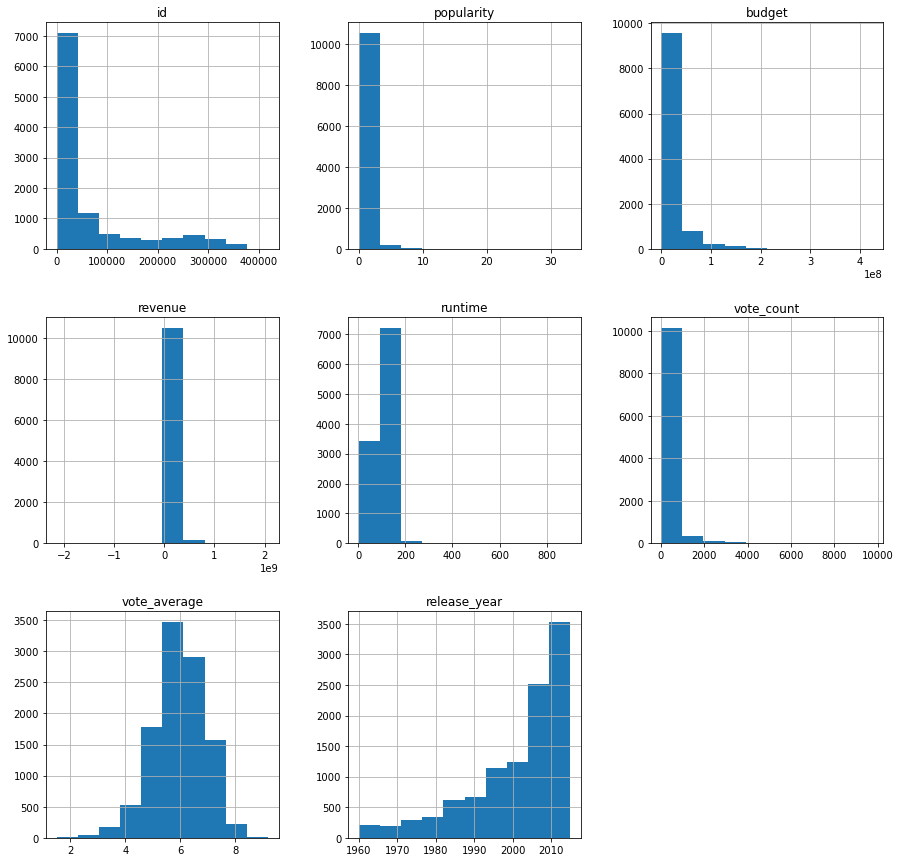

In [29]:
df.hist(figsize= (15,15));

In [30]:
# replace value in geners with the first occurrence
df['genres'] = df['genres'].apply(lambda x: x.split("|")[0])

#### replace data in genres column with the first occurrencs of data to identify accuracy data

In [31]:
#check data after replacmen in genres by print first three columns
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure,3/18/15,2480,6.3,2015


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Which genres are most popular from year to year?

In [49]:
def myGraPplot(df,grpVar,yVar,stat='mean',figsize=[14,6],color='steelblue'):
    """
    Docstring: function to make groupby for culomns with mean for another and plot the result.
    Args: 
        df,grpVar,yVar,stat,figsize,color
    Returns:
        data 
    """
    #data prepration
    data=df.groupby([grpVar])[yVar].agg(stat)
    #plot
    data.plot.bar(edgecolor='black',figsize=figsize,rot=0,width=0.8,color=color);
    #add title and format it
    plt.title(f'{stat} of {yVar} by {grpVar}'.title(),fontsize = 19, weight="bold")
    #add x label and format it
    plt.xlabel(grpVar.title(),fontsize=19,weight="bold")
    #add y label and format it
    plt.ylabel(f'{stat} {yVar}'.title(),fontsize=19,weight="bold")
    sns.set_style("darkgrid")
    plt.legend();
    return data

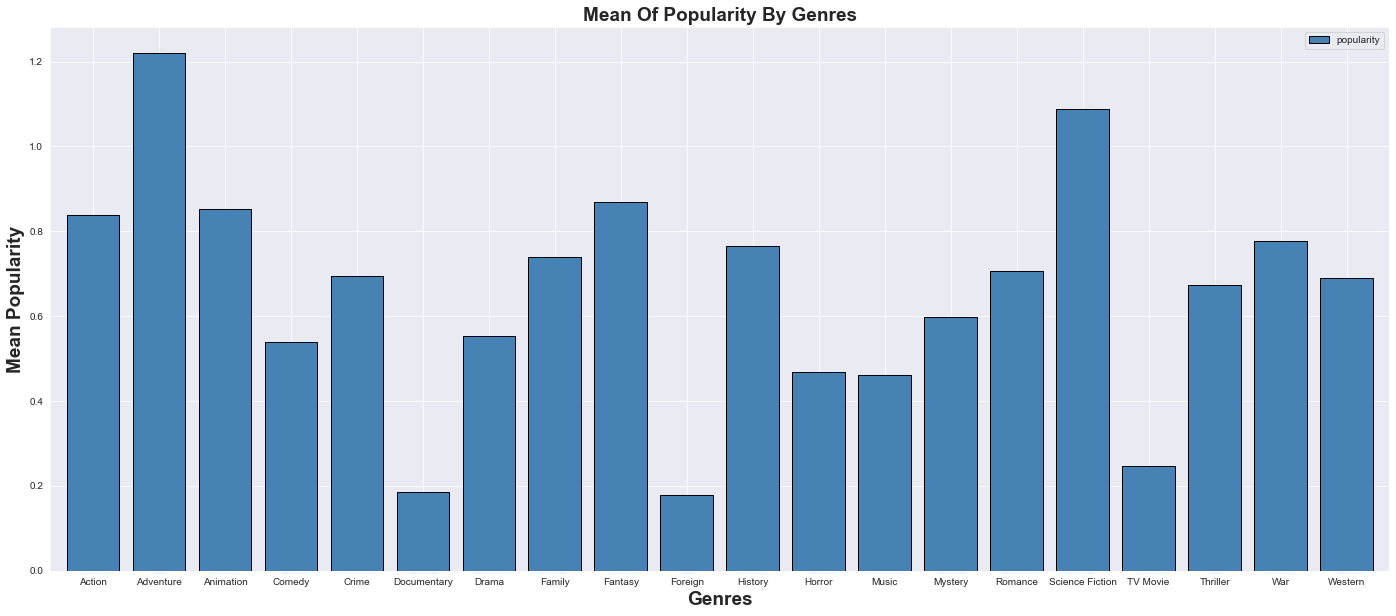

In [50]:
genres_of_popular=myGraPplot(df,'genres','popularity',figsize=[24,10])

In [51]:
genres_of_popular

genres
Action             0.837782
Adventure          1.219834
Animation          0.853208
Comedy             0.538260
Crime              0.694063
Documentary        0.184773
Drama              0.554173
Family             0.739779
Fantasy            0.868512
Foreign            0.178917
History            0.764636
Horror             0.468638
Music              0.462125
Mystery            0.596896
Romance            0.707231
Science Fiction    1.087261
TV Movie           0.245873
Thriller           0.673381
War                0.777887
Western            0.690646
Name: popularity, dtype: float64

### after make visualization the genres most popular is : Adventure movies

### Research Question 2: Which genres has the highest and lowest budget from year to year?

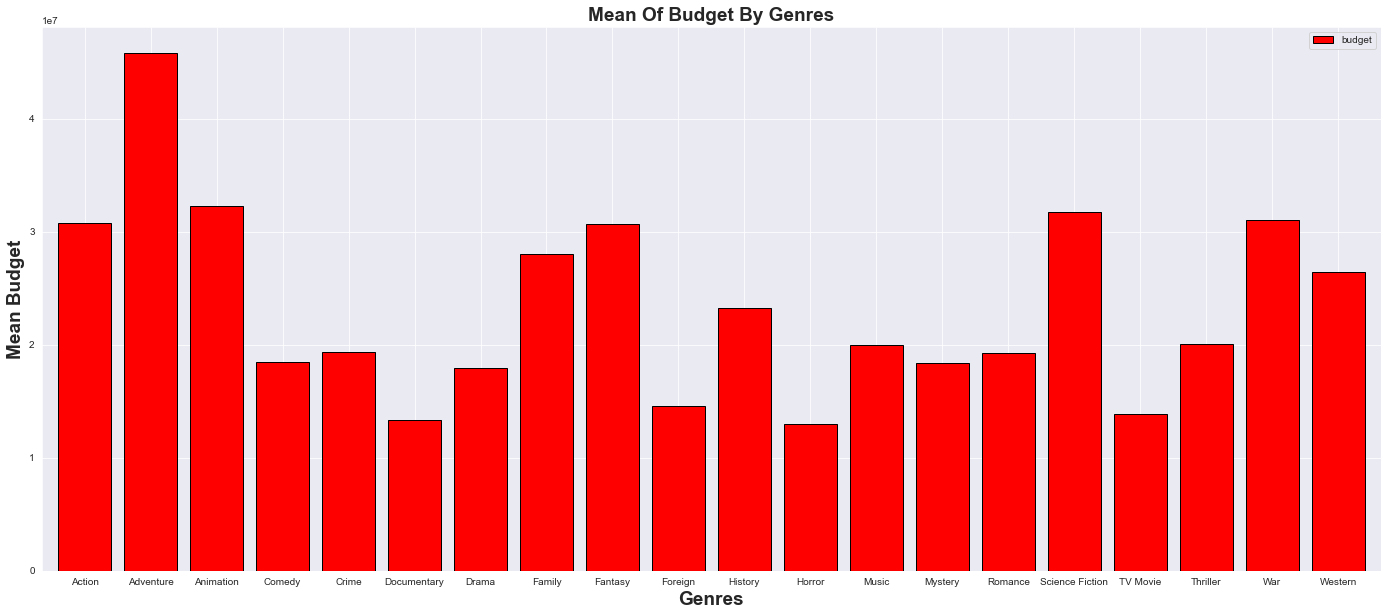

In [52]:
genres_of_budget= myGraPplot(df,'genres','budget',figsize=[24,10],color='red')

In [36]:
genres_of_budget

genres
Action             3.078424e+07
Adventure          4.582701e+07
Animation          3.229418e+07
Comedy             1.846687e+07
Crime              1.939363e+07
Documentary        1.335289e+07
Drama              1.793335e+07
Family             2.805157e+07
Fantasy            3.065852e+07
Foreign            1.462429e+07
History            2.324667e+07
Horror             1.301563e+07
Music              1.994826e+07
Mystery            1.841293e+07
Romance            1.925498e+07
Science Fiction    3.177570e+07
TV Movie           1.389967e+07
Thriller           2.004800e+07
War                3.104419e+07
Western            2.648094e+07
Name: budget, dtype: float64

### after make visualization 
####  genres has highest budget is : Adventure movies
#### genres has lowest budget is : Horror movies

### Research Question 3 : Which year has the highest release of movies?

In [37]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
num_of_release_per_year=df.groupby('release_year').count()['id']
print(num_of_release_per_year)

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     38
1968     38
1969     30
1970     40
1971     55
1972     40
1973     55
1974     46
1975     44
1976     47
1977     56
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    104
1985    108
1986    120
1987    124
1988    142
1989    135
1990    132
1991    133
1992    132
1993    177
1994    184
1995    174
1996    203
1997    191
1998    210
1999    224
2000    224
2001    241
2002    264
2003    281
2004    307
2005    361
2006    404
2007    432
2008    486
2009    525
2010    475
2011    532
2012    574
2013    649
2014    682
2015    617
Name: id, dtype: int64


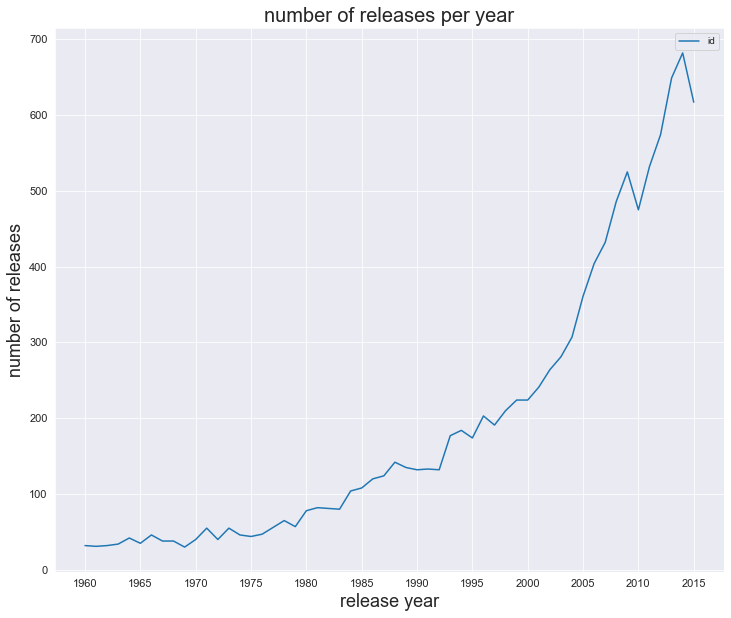

In [53]:
#make visualization for the result
num_of_release_per_year.plot(xticks = np.arange(1960,2016,5),fontsize = 11,figsize=(12,10));
plt.title('number of releases per year',fontsize = 20)
plt.xlabel('release year', fontsize=18)
plt.ylabel('number of releases', fontsize=18)
plt.legend();
sns.set_style("darkgrid")

### the year has highest release of movies is :2014

### Research Question 3 : What level of vote rating(vote_average value)receives highest revenue?

In [39]:
#first i will describe vote_average columns
df['vote_average'].describe()

count    10731.000000
mean         5.964710
std          0.930283
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

In [40]:
# Bin edges that will be used to "cut" the data into groups
bin_edges =['1.5','5.4','6.0','6.6','9.2']

In [41]:
# Labels for the four voting rate groups
bin_names = ['low','medium','mod_high','high']

In [42]:
# Creates voting_rate column
df['voting_rate'] = pd.cut(df['vote_average'], bin_edges, labels=bin_names)
# Checks for successful creation of this column
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,voting_rate
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,6/9/15,5562,6.5,2015,mod_high
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,5/13/15,6185,7.1,2015,high
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure,3/18/15,2480,6.3,2015,mod_high
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action,12/15/15,5292,7.5,2015,high
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action,4/1/15,2947,7.3,2015,high


In [43]:
#knowing average revenue with each category of vote rating 
voting_rate_revenue_avg=df.groupby('voting_rate').revenue.mean()
print(voting_rate_revenue_avg)

voting_rate
low         4.058686e+07
medium      5.655774e+07
mod_high    6.902263e+07
high        8.356196e+07
Name: revenue, dtype: float64


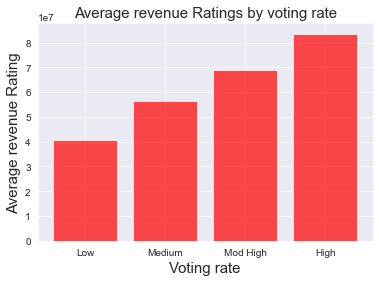

In [44]:
# Create a bar chart with proper labels
locations = [1,2, 3, 4]  # reorder values above to go from low to high
heights = voting_rate_revenue_avg

# labels = ['Low', 'Medium', 'Moderately High', 'High']
labels = voting_rate_revenue_avg.index.str.replace('_', ' ').str.title() # alternative to commented out line above

plt.bar(locations, heights, tick_label=labels,color='red',alpha=.7);
plt.title('Average revenue Ratings by voting rate',fontsize = 15);
plt.xlabel('Voting rate',fontsize = 15);
plt.ylabel('Average revenue Rating',fontsize = 15);



### exactly High average Revenue relative to high vote rate

<a id='conclusions'></a>
## Conclusions

> after analysy for data set and answer question that i posed:
- the genres most popular is : Adventure movies
- genres has highest budget is : Adventure movies
- genres has lowest budget is : Horror movies
- the year has highest release of movies is :2014
- High average Revenue relative to high vote rate

## limitations

> The analysis that has been done now cannot be guaranteed to be completely free of errors. However, this analysis was done through the data that was given to us.
It is not possible to fully predict its correctness or the possibility of it being completely free from errors.
It is also wrong to ensure that the results produced by the analysis are completely correct or 100%
Since those data were missing data, they also contained zeros
Also, some data has been deducted from it until some questions are answered.
Addressing these data-related problems may affect in one way or another the validity of those exported data in such a way that it may be definitively certain.
